In [15]:
%pip install -q matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [61]:
# The following is the result of a run through a performance
# test on a ESP32.  The test was run on a Huzzah32 board
# with 4MB of flash and 520KB of RAM.  At the start of the test

testData = """
I (2593) RaftJsonPerfTestJsmn: free heap 283364
Running test_json_large...
I (3115) JsonPerfTestLarge: RaftJSON_jsmn Create: 5250 us 22224 bytes
I (3116) JsonPerfTestLarge: RaftJson_jsmn GetInt: 344 us 0 bytes
I (3117) JsonPerfTestLarge: ArduinoJson Parse: 54894 us 13152 bytes
I (3123) JsonPerfTestLarge: ArduinoJson GetInt: 24 us 0 bytes
I (3128) JsonPerfTestLarge: RaftJson Direct GetInt: 559 us 0 bytes
I (3134) JsonPerfTestLarge: Count Json Doc Lines: 651 us 0 bytes
./main/RaftJson_perf_test_large.cpp:29:test_json_large:PASS
Running test_json_small...
I (3206) JsonPerfTestSmall: RaftJSON_jsmn Create: 307 us 884 bytes
I (3206) JsonPerfTestSmall: RaftJson_jsmn GetInt: 111 us 0 bytes
I (3207) JsonPerfTestSmall: ArduinoJson Parse: 477 us 600 bytes
I (3212) JsonPerfTestSmall: ArduinoJson GetInt: 7 us 0 bytes
I (3218) JsonPerfTestSmall: RaftJson Direct GetInt: 28 us 0 bytes
./main/RaftJson_perf_test_small.cpp:29:test_json_small:PASS
"""

code_size_base = 203136
code_size_libraries = [208640, 218224, 204624]
code_size_lib_deltas = [x - code_size_base for x in code_size_libraries]



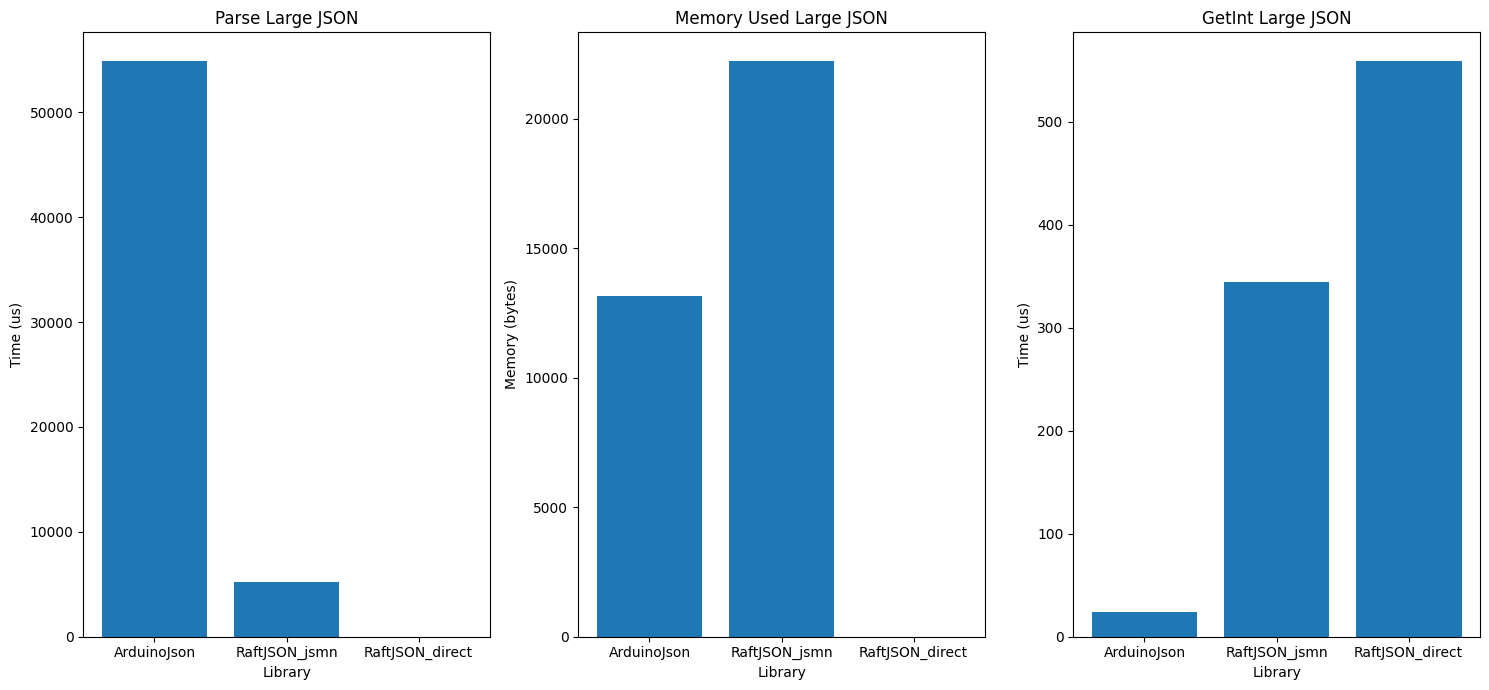

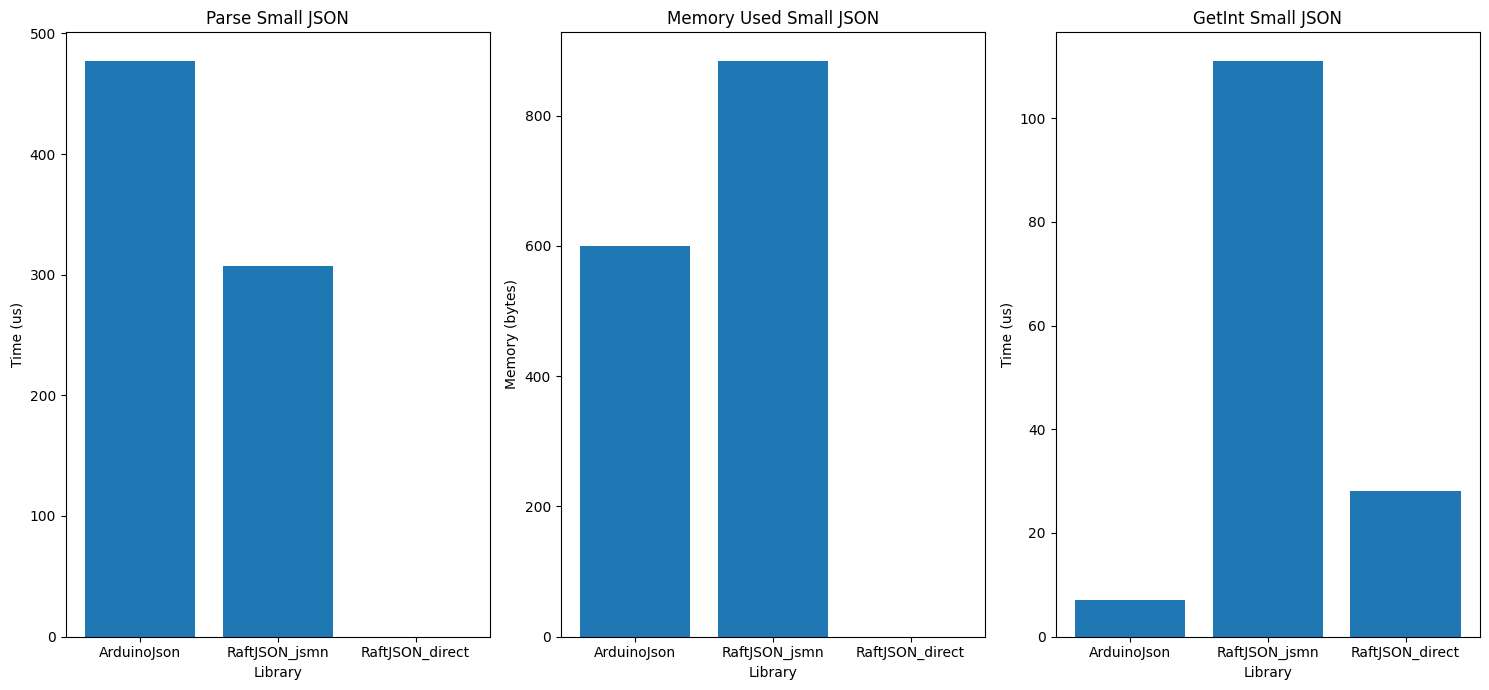

In [26]:
# There are three JSON libraries being tested here:
# - ArduinoJson
# - RaftJSON_jsmn
# - RaftJSON_direct

# The ArduinoJson library is the most feature rich and
# but quite memory intensive.  It is the slowest to parse
# but the fastest to access the data.
# The RaftJSON_jsmn library uses the JSMN parser and
# is in the middle both in terms of parsing and accessing
# data but it uses the most memory.
# The RaftJSON_direct library is the fastest to parse
# since it actually doesn't parse at all but is the slowest
# to access data. It uses no memory at all.

# The following is a plot of the results of the test.
# The X axis is the test name and the Y axis is the time
# in microseconds.  

# The test_json_large test is a test of a large JSON document
# with 600 lines of data (20K bytes).  The test_json_small test
# is much smaller - only 20 lines of data (<500 bytes).

# Count Json Doc Lines is simply a test to count the number of
# lines in the JSON document using a C++ loop.  It is included
# to give some perspective on the time it takes to parse the
# JSON document.

library_names = ['ArduinoJson', 'RaftJSON_jsmn', 'RaftJSON_direct']
parse_times_for_large_json = [54894, 5250, 0]
parse_times_for_small_json = [477, 307, 0]
get_int_times_for_large_json = [24, 344, 559]
get_int_times_for_small_json = [7, 111, 28]
memory_used_for_large_json = [13152, 22224, 0]
memory_used_for_small_json = [600, 884, 0]

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title('Parse Large JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.bar(library_names, parse_times_for_large_json)
plt.subplot(1, 3, 2)
plt.title('Memory Used Large JSON')
plt.xlabel('Library')
plt.ylabel('Memory (bytes)')
plt.bar(library_names, memory_used_for_large_json)
plt.subplot(1, 3, 3)
plt.title('GetInt Large JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.bar(library_names, get_int_times_for_large_json)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title('Parse Small JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.bar(library_names, parse_times_for_small_json)
plt.subplot(1, 3, 2)
plt.title('Memory Used Small JSON')
plt.xlabel('Library')
plt.ylabel('Memory (bytes)')
plt.bar(library_names, memory_used_for_small_json)
plt.subplot(1, 3, 3)
plt.title('GetInt Small JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.bar(library_names, get_int_times_for_small_json)
plt.tight_layout()
plt.show()


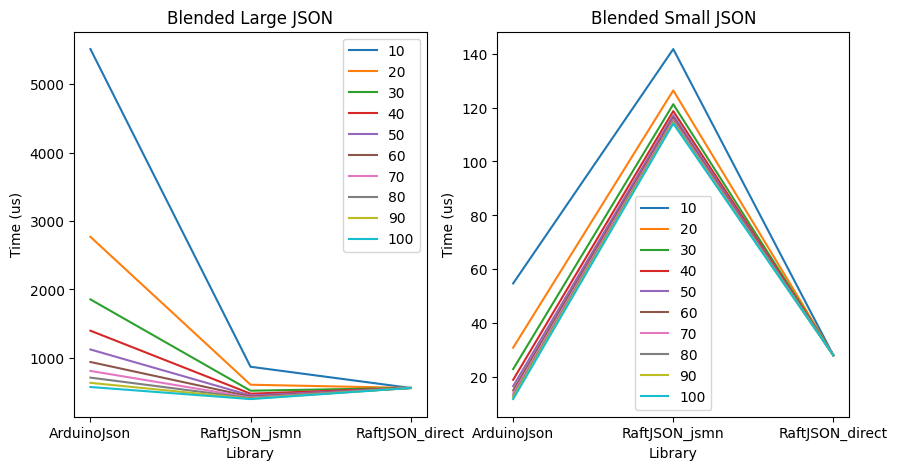

In [18]:
# Calculate blended figures for parsing data and then accessing N values
# from the parsed data.  The blended figure is the sum of the two times
# divided by the number of values accessed.  This gives a rough idea of
# the total time to parse the data and then access the data.

# Create a dataset with blended values using 10,20,30,40,50,60,70,80,90,100 values accessed
# and plot the results.

def get_blended_times(num_values_accessed):
    blended_times_for_large_json = []
    blended_times_for_small_json = []
    for i in range(len(library_names)):
        large_json_blended_times_for_library = []
        small_json_blended_times_for_library = []
        for j in range(len(num_values_accessed)):
            large_json_blended_times_for_library.append((parse_times_for_large_json[i] + get_int_times_for_large_json[i] * num_values_accessed[j]) / num_values_accessed[j])
            small_json_blended_times_for_library.append((parse_times_for_small_json[i] + get_int_times_for_small_json[i] * num_values_accessed[j]) / num_values_accessed[j])
        blended_times_for_large_json.append(large_json_blended_times_for_library)
        blended_times_for_small_json.append(small_json_blended_times_for_library)
    return blended_times_for_large_json, blended_times_for_small_json

num_values_accessed = [10,20,30,40,50,60,70,80,90,100]
blended_times_for_large_json, blended_times_for_small_json = get_blended_times(num_values_accessed)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Blended Large JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.plot(library_names, blended_times_for_large_json)
plt.legend(num_values_accessed)
plt.subplot(1, 2, 2)
plt.title('Blended Small JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.plot(library_names, blended_times_for_small_json)
plt.legend(num_values_accessed)
plt.show()



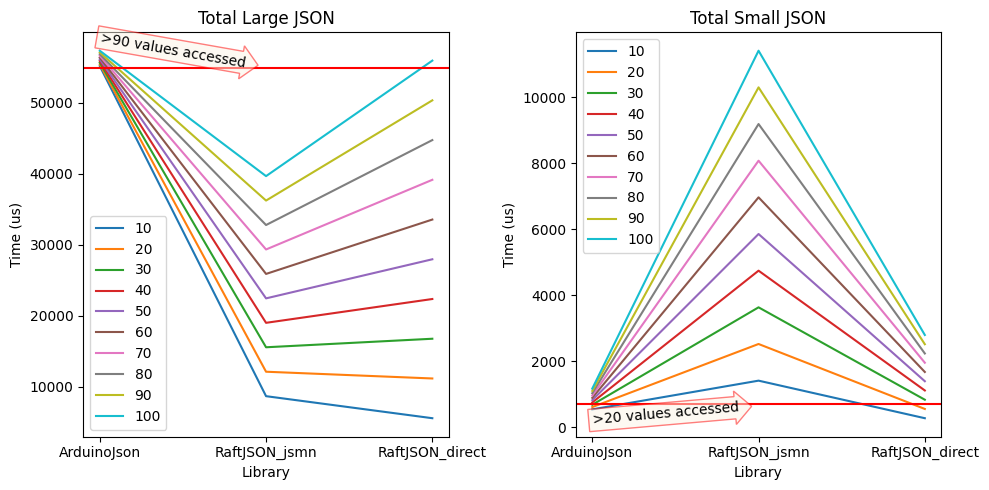

In [56]:
# Calculate total times for parsing data and then accessing N values
# from the parsed data.  The total time is the sum of the two times.
# This gives a rough idea of the total time to parse the data and
# then access the data.

# Create a dataset with total values using 10,20,30,40,50,60,70,80,90,100 values accessed
# and plot the results.

def get_total_times(num_values_accessed):
    total_times_for_large_json = []
    total_times_for_small_json = []
    for i in range(len(library_names)):
        large_json_total_times_for_library = []
        small_json_total_times_for_library = []
        for j in range(len(num_values_accessed)):
            large_json_total_times_for_library.append(parse_times_for_large_json[i] + get_int_times_for_large_json[i] * num_values_accessed[j])
            small_json_total_times_for_library.append(parse_times_for_small_json[i] + get_int_times_for_small_json[i] * num_values_accessed[j])
        total_times_for_large_json.append(large_json_total_times_for_library)
        total_times_for_small_json.append(small_json_total_times_for_library)
    return total_times_for_large_json, total_times_for_small_json

num_values_accessed = [10,20,30,40,50,60,70,80,90,100]
total_times_for_large_json, total_times_for_small_json = get_total_times(num_values_accessed)

# Add horizontal lines for the total time to parse the JSON document
# and the time to count the number of lines in the JSON document.
# This gives a rough idea of the total time to parse the data and
# then access the data.

# Add annotation of the lines with the number of values accessed.

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Total Large JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.plot(library_names, total_times_for_large_json)
plt.axhline(y=parse_times_for_large_json[0], color='r', linestyle='-')
plt.text(0, 55000, '>90 values accessed', rotation=-10, bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "rarrow,pad=0.3", 'ec': 'red'})
plt.legend(num_values_accessed)
plt.subplot(1, 2, 2)
plt.title('Total Small JSON')
plt.xlabel('Library')
plt.ylabel('Time (us)')
plt.plot(library_names, total_times_for_small_json)
plt.axhline(y=700, color='r', linestyle='-')
plt.text(0, 100, '>20 values accessed', rotation=5, bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "rarrow,pad=0.3", 'ec': 'red'})
plt.legend(num_values_accessed)
plt.tight_layout()
plt.show()

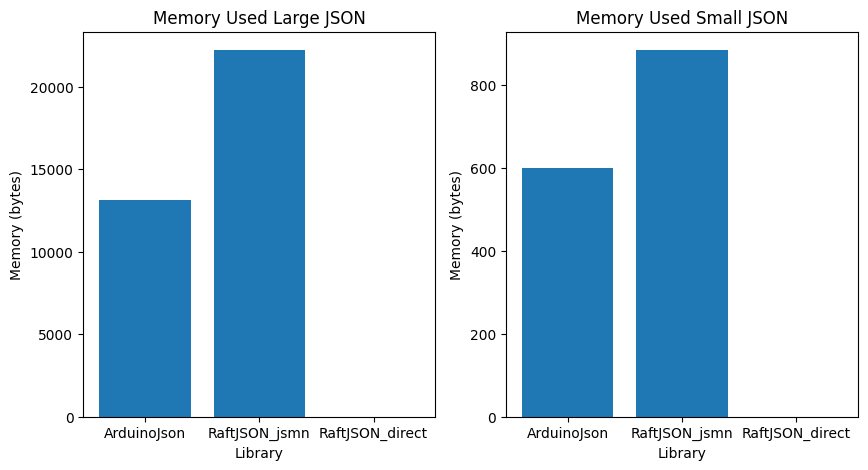

In [19]:

# The following is a plot of the memory used by each library.
# The X axis is the test name and the Y axis is the memory
# used in bytes.


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Memory Used Large JSON')
plt.xlabel('Library')
plt.ylabel('Memory (bytes)')
plt.bar(library_names, memory_used_for_large_json)
plt.subplot(1, 2, 2)
plt.title('Memory Used Small JSON')
plt.xlabel('Library')
plt.ylabel('Memory (bytes)')
plt.bar(library_names, memory_used_for_small_json)
plt.show()


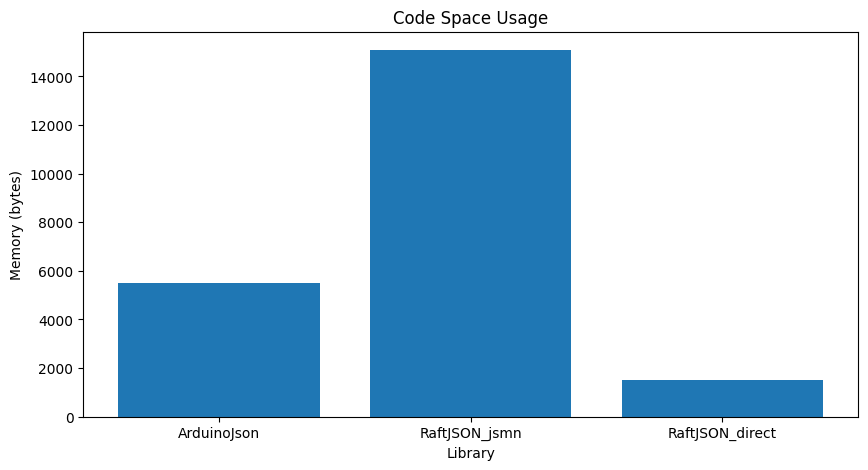

| Library | Code Size |
| ------- | --------- |
| ArduinoJson | 5504 |
| RaftJSON_jsmn | 15088 |
| RaftJSON_direct | 1488 |
| Library | Large JSON | Small JSON |
| ------- | ---------- | ---------- |
| ArduinoJson | 13152 | 600 |
| RaftJSON_jsmn | 22224 | 884 |
| RaftJSON_direct | 0 | 0 |
| Library | Large JSON | Small JSON |
| ------- | ---------- | ---------- |
| ArduinoJson | 54894 | 477 |
| RaftJSON_jsmn | 5250 | 307 |
| RaftJSON_direct | 0 | 0 |
| Library | Large JSON | Small JSON |
| ------- | ---------- | ---------- |
| ArduinoJson | 24 | 7 |
| RaftJSON_jsmn | 344 | 111 |
| RaftJSON_direct | 559 | 28 |
| Library | Large JSON | Small JSON |
| ------- | ---------- | ---------- |
| ArduinoJson | [55134, 55374, 55614, 55854, 56094, 56334, 56574, 56814, 57054, 57294] | [547, 617, 687, 757, 827, 897, 967, 1037, 1107, 1177] |
| RaftJSON_jsmn | [8690, 12130, 15570, 19010, 22450, 25890, 29330, 32770, 36210, 39650] | [1417, 2527, 3637, 4747, 5857, 6967, 8077, 9187, 10297, 11407] |
| RaftJ

In [64]:
# Code space usage charts

plt.figure(figsize=(10, 5))
plt.title('Code Space Usage')
plt.xlabel('Library')
plt.ylabel('Memory (bytes)')
plt.bar(library_names, code_size_lib_deltas)
plt.show()

# Table of code sizes in markdown format

print('| Library | Code Size |')
print('| ------- | --------- |')
for i in range(len(library_names)):
    print('| {} | {} |'.format(library_names[i], code_size_lib_deltas[i]))

# Table of memory usage in markdown format
    
print('| Library | Large JSON | Small JSON |')
print('| ------- | ---------- | ---------- |')
for i in range(len(library_names)):
    print('| {} | {} | {} |'.format(library_names[i], memory_used_for_large_json[i], memory_used_for_small_json[i]))


# Table of parse times in markdown format
    
print('| Library | Large JSON | Small JSON |')
print('| ------- | ---------- | ---------- |')
for i in range(len(library_names)):
    print('| {} | {} | {} |'.format(library_names[i], parse_times_for_large_json[i], parse_times_for_small_json[i]))

# Table of get int times in markdown format

print('| Library | Large JSON | Small JSON |')
print('| ------- | ---------- | ---------- |')
for i in range(len(library_names)):
    print('| {} | {} | {} |'.format(library_names[i], get_int_times_for_large_json[i], get_int_times_for_small_json[i]))

# Table of total times in markdown format

print('| Library | Large JSON | Small JSON |')
print('| ------- | ---------- | ---------- |')
for i in range(len(library_names)):
    print('| {} | {} | {} |'.format(library_names[i], total_times_for_large_json[i], total_times_for_small_json[i]))
    


